In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
# plt.style.use('seaborn')
import warnings
warnings.filterwarnings("ignore")
import yfinance as yf
from Backtest import *
np.random.seed(44)

In [3]:
df = yf.download("INFY.NS")[["Adj Close"]].pct_change(1)
df.columns = ["returns"]

# Features engeeniring
df["returns t-1"] = df[["returns"]].shift(1)

# Mean of returns
df["mean returns 15"] = df[["returns"]].rolling(15).mean().shift(1)
df["mean returns 60"] = df[["returns"]].rolling(60).mean().shift(1)

# Volatility of returns
df["volatility returns 15"] = df[["returns"]].rolling(15).std().shift(1)
df["volatility returns 60"] = df[["returns"]].rolling(60).std().shift(1)

# Drop missing values
df = df.dropna()

# Percentage train set
split = int(0.80*len(df))

# Train set creation
X_train = df[["returns t-1", "mean returns 15", "mean returns 60",
              "volatility returns 15",
              "volatility returns 60"]].iloc[:split]

y_train_reg = df[["returns"]].iloc[:split]

y_train_cla = np.round(df[["returns"]].iloc[:split]+0.5)


# Test set creation
X_test = df[["returns t-1", "mean returns 15", "mean returns 60",
              "volatility returns 15",
              "volatility returns 60"]].iloc[split:]

y_test_reg = df[["returns"]].iloc[split:]
y_test_cla = np.round(df[["returns"]].iloc[split:]+0.5)


# NORMALIZATION 
# Import the class
from sklearn.preprocessing import StandardScaler

# Initialize the class
sc = StandardScaler()

# Standardize the data
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

[*********************100%%**********************]  1 of 1 completed


In [4]:
np.random.seed(69)
# LIBAIRIES
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

nb_hidden_layer = 1


# INTIALIZATION SEQUENTIAL MODEL
classifier = Sequential()

# AJOUT COUCHE DENSE ET DROPOUT
for _ in range(nb_hidden_layer):
    classifier.add(Dense(75, input_shape = (X_train.shape[1],), activation="relu"))


# AJOUT COUCHE DENSE
classifier.add(Dense(1, activation="sigmoid"))

# COMPILATION DU MODÈLE
classifier.compile(loss="binary_crossentropy", optimizer="adam")

# TRAINING
classifier.fit(X_train_scaled, y_train_cla, epochs=69, batch_size=150, verbose=1)
classifier.save('INFY.h5')

2024-01-01 22:09:39.101830: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-01-01 22:09:39.528841: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-01 22:09:39.528883: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-01 22:09:39.599640: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-01-01 22:09:39.728738: I tensorflow/core/platform/cpu_feature_guar

Epoch 1/69


2024-01-01 22:09:43.875260: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-01-01 22:09:43.875348: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-01-01 22:09:43.879371: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-01-01 22:09:43.879440: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-01-01 22:09:43.879465: I external/local_xla/xla/stream_executor

FailedPreconditionError: Graph execution error:

Detected at node Adam/StatefulPartitionedCall_2 defined at (most recent call last):
  File "/home/mcb76/miniconda3/envs/tf/lib/python3.10/runpy.py", line 196, in _run_module_as_main

  File "/home/mcb76/miniconda3/envs/tf/lib/python3.10/runpy.py", line 86, in _run_code

  File "/home/mcb76/miniconda3/envs/tf/lib/python3.10/site-packages/ipykernel_launcher.py", line 17, in <module>

  File "/home/mcb76/miniconda3/envs/tf/lib/python3.10/site-packages/traitlets/config/application.py", line 1053, in launch_instance

  File "/home/mcb76/miniconda3/envs/tf/lib/python3.10/site-packages/ipykernel/kernelapp.py", line 737, in start

  File "/home/mcb76/miniconda3/envs/tf/lib/python3.10/site-packages/tornado/platform/asyncio.py", line 195, in start

  File "/home/mcb76/miniconda3/envs/tf/lib/python3.10/asyncio/base_events.py", line 603, in run_forever

  File "/home/mcb76/miniconda3/envs/tf/lib/python3.10/asyncio/base_events.py", line 1906, in _run_once

  File "/home/mcb76/miniconda3/envs/tf/lib/python3.10/asyncio/events.py", line 80, in _run

  File "/home/mcb76/miniconda3/envs/tf/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 524, in dispatch_queue

  File "/home/mcb76/miniconda3/envs/tf/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 513, in process_one

  File "/home/mcb76/miniconda3/envs/tf/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 418, in dispatch_shell

  File "/home/mcb76/miniconda3/envs/tf/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 758, in execute_request

  File "/home/mcb76/miniconda3/envs/tf/lib/python3.10/site-packages/ipykernel/ipkernel.py", line 426, in do_execute

  File "/home/mcb76/miniconda3/envs/tf/lib/python3.10/site-packages/ipykernel/zmqshell.py", line 549, in run_cell

  File "/home/mcb76/miniconda3/envs/tf/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3048, in run_cell

  File "/home/mcb76/miniconda3/envs/tf/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3103, in _run_cell

  File "/home/mcb76/miniconda3/envs/tf/lib/python3.10/site-packages/IPython/core/async_helpers.py", line 129, in _pseudo_sync_runner

  File "/home/mcb76/miniconda3/envs/tf/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3308, in run_cell_async

  File "/home/mcb76/miniconda3/envs/tf/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3490, in run_ast_nodes

  File "/home/mcb76/miniconda3/envs/tf/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3550, in run_code

  File "/tmp/ipykernel_4385/529787289.py", line 25, in <module>

  File "/home/mcb76/miniconda3/envs/tf/lib/python3.10/site-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler

  File "/home/mcb76/miniconda3/envs/tf/lib/python3.10/site-packages/keras/src/engine/training.py", line 1807, in fit

  File "/home/mcb76/miniconda3/envs/tf/lib/python3.10/site-packages/keras/src/engine/training.py", line 1401, in train_function

  File "/home/mcb76/miniconda3/envs/tf/lib/python3.10/site-packages/keras/src/engine/training.py", line 1384, in step_function

  File "/home/mcb76/miniconda3/envs/tf/lib/python3.10/site-packages/keras/src/engine/training.py", line 1373, in run_step

  File "/home/mcb76/miniconda3/envs/tf/lib/python3.10/site-packages/keras/src/engine/training.py", line 1154, in train_step

  File "/home/mcb76/miniconda3/envs/tf/lib/python3.10/site-packages/keras/src/optimizers/optimizer.py", line 544, in minimize

  File "/home/mcb76/miniconda3/envs/tf/lib/python3.10/site-packages/keras/src/optimizers/optimizer.py", line 1223, in apply_gradients

  File "/home/mcb76/miniconda3/envs/tf/lib/python3.10/site-packages/keras/src/optimizers/optimizer.py", line 652, in apply_gradients

  File "/home/mcb76/miniconda3/envs/tf/lib/python3.10/site-packages/keras/src/optimizers/optimizer.py", line 1253, in _internal_apply_gradients

  File "/home/mcb76/miniconda3/envs/tf/lib/python3.10/site-packages/keras/src/optimizers/optimizer.py", line 1345, in _distributed_apply_gradients_fn

  File "/home/mcb76/miniconda3/envs/tf/lib/python3.10/site-packages/keras/src/optimizers/optimizer.py", line 1340, in apply_grad_to_update_var

DNN library initialization failed. Look at the errors above for more details.
	 [[{{node Adam/StatefulPartitionedCall_2}}]] [Op:__inference_train_function_758]

136/219 [=================>............] - ETA: 0s

2024-01-01 18:04:09.569756: W tensorflow/compiler/mlir/tools/kernel_gen/transforms/gpu_kernel_to_blob_pass.cc:191] Failed to compile generated PTX with ptxas. Falling back to compilation by driver.


219/219 [==============================] - 0s 1ms/step
[*********************100%%**********************]  1 of 1 completed

    -----------------------------------------------------------------------------
    Beta: 0.694 	 Alpha: 8.41 %	     Sharpe: 0.953 	 Sortino: 0.083
  -----------------------------------------------------------------------------
    VaR: 3.48 %	 cVaR: 4.32 % 	     VaR/cVaR: 1.242 	 drawdown: 83.0 %
  -----------------------------------------------------------------------------


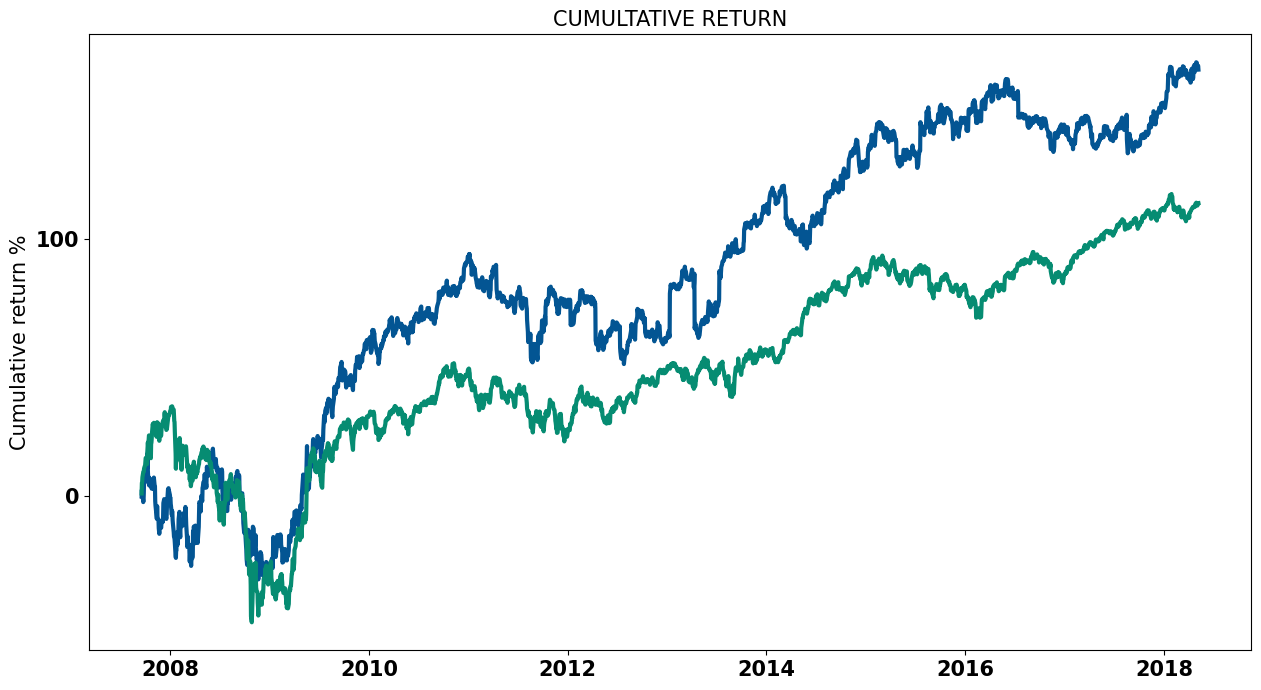

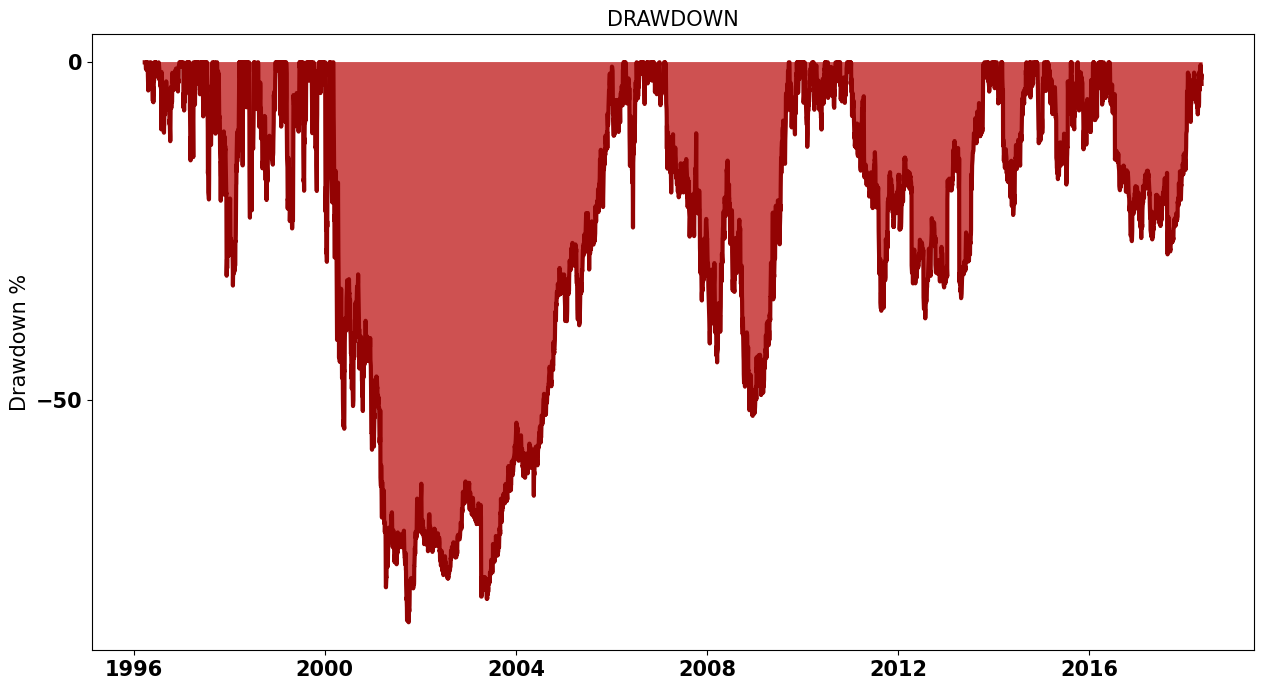

In [ ]:
# Create predictions for the whole dataset
df["prediction"] = classifier.predict(np.concatenate((X_train,X_test),
                                    axis=0))
df["prediction"] = np.where(df["prediction"] == 0, -1,1)
# Compute the strategy
df["strategy"] = np.sign(df["prediction"]) * df["returns"]

# Backtest
backtest_dynamic_portfolio(df["strategy"].iloc[:split])

In [ ]:
df

In [ ]:
np.random.seed(69)# LIBAIRIES
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

nb_hidden_layer = 1


# INTIALIZATION SEQUENTIAL MODEL
regressor = Sequential()

# ADD HIDDEN LAYER
for _ in range(nb_hidden_layer):
    regressor.add(Dense(75, input_shape = (X_train.shape[1],), activation="relu"))


# OUTPUT LAYER DENSE
regressor.add(Dense(1, activation="linear"))

# COMPILE THE MODEL
regressor.compile(loss="mse", optimizer="adam")

# TRAINING
regressor.fit(X_train_scaled, y_train_reg, epochs=13, batch_size=32, verbose=1)

Epoch 1/13


2024-01-01 18:04:11.277716: W tensorflow/compiler/mlir/tools/kernel_gen/transforms/gpu_kernel_to_blob_pass.cc:191] Failed to compile generated PTX with ptxas. Falling back to compilation by driver.
2024-01-01 18:04:11.282335: W tensorflow/compiler/mlir/tools/kernel_gen/transforms/gpu_kernel_to_blob_pass.cc:191] Failed to compile generated PTX with ptxas. Falling back to compilation by driver.
2024-01-01 18:04:11.282811: W tensorflow/compiler/mlir/tools/kernel_gen/transforms/gpu_kernel_to_blob_pass.cc:191] Failed to compile generated PTX with ptxas. Falling back to compilation by driver.
2024-01-01 18:04:11.283079: W tensorflow/compiler/mlir/tools/kernel_gen/transforms/gpu_kernel_to_blob_pass.cc:191] Failed to compile generated PTX with ptxas. Falling back to compilation by driver.
2024-01-01 18:04:11.283315: W tensorflow/compiler/mlir/tools/kernel_gen/transforms/gpu_kernel_to_blob_pass.cc:191] Failed to compile generated PTX with ptxas. Falling back to compilation by driver.
2024-01-01

175/175 [==============================] - 1s 3ms/step - loss: 0.0055
Epoch 2/13
175/175 [==============================] - 0s 3ms/step - loss: 0.0013
Epoch 3/13
175/175 [==============================] - 0s 3ms/step - loss: 0.0011
Epoch 4/13
175/175 [==============================] - 0s 3ms/step - loss: 0.0010
Epoch 5/13
175/175 [==============================] - 1s 3ms/step - loss: 9.7122e-04
Epoch 6/13
175/175 [==============================] - 0s 3ms/step - loss: 9.0233e-04
Epoch 7/13
175/175 [==============================] - 0s 2ms/step - loss: 9.0131e-04
Epoch 8/13
175/175 [==============================] - 0s 3ms/step - loss: 8.9045e-04
Epoch 9/13
175/175 [==============================] - 1s 3ms/step - loss: 8.5942e-04
Epoch 10/13
175/175 [==============================] - 1s 3ms/step - loss: 8.9332e-04
Epoch 11/13
175/175 [==============================] - 1s 3ms/step - loss: 8.1693e-04
Epoch 12/13
175/175 [==============================] - 1s 3ms/step - loss: 7.9907e-04
Epoc

219/219 [==============================] - 0s 1ms/step
[*********************100%%**********************]  1 of 1 completed

    -----------------------------------------------------------------------------
    Beta: 0.139 	 Alpha: 8.63 %	     Sharpe: 0.386 	 Sortino: 0.032
  -----------------------------------------------------------------------------
    VaR: 3.46 %	 cVaR: 4.05 % 	     VaR/cVaR: 1.171 	 drawdown: 33.14 %
  -----------------------------------------------------------------------------


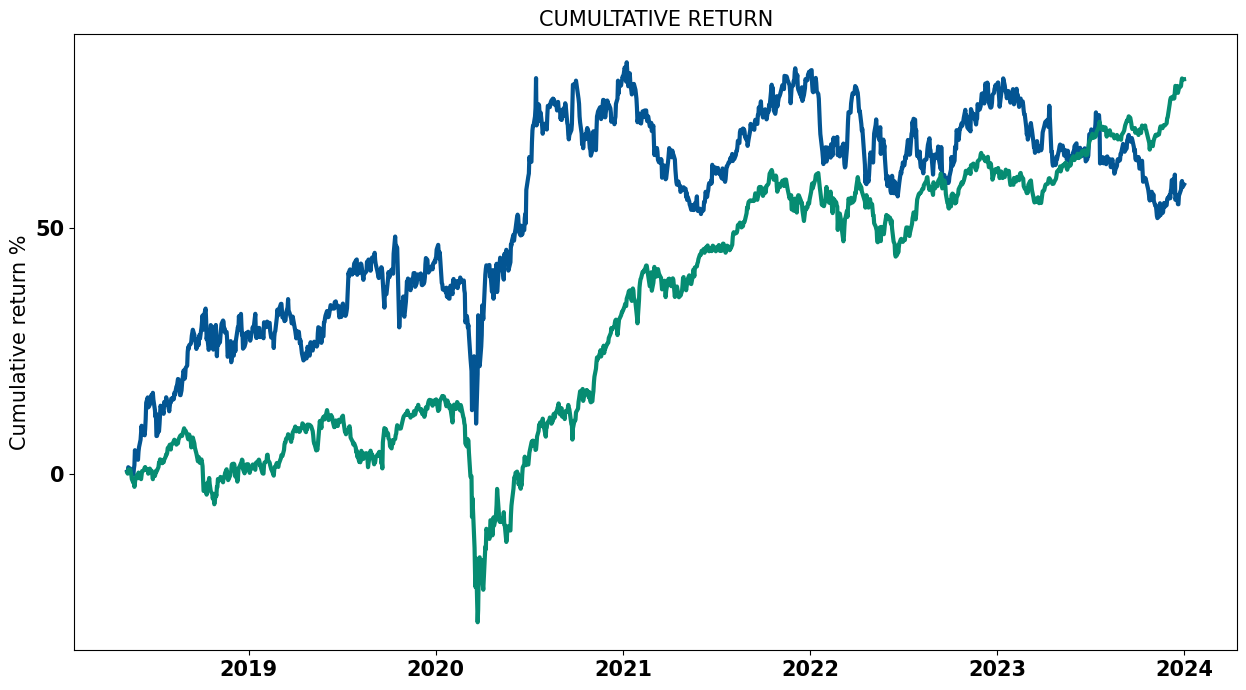

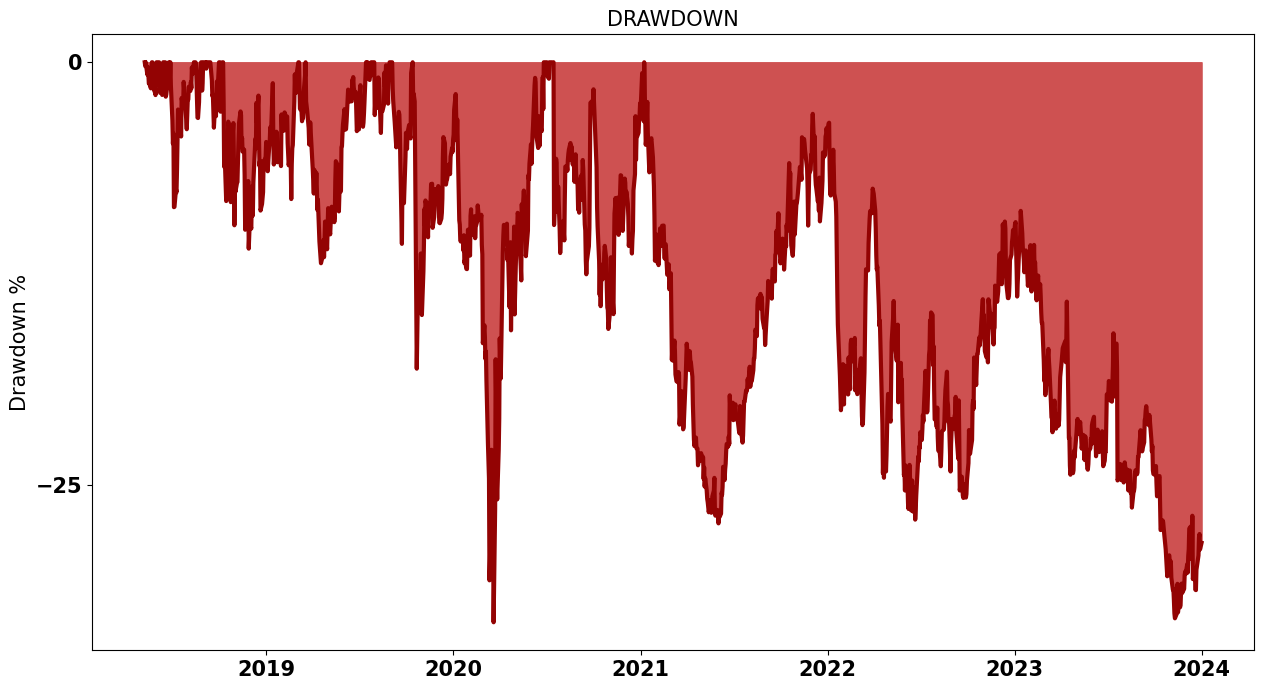

In [ ]:
# Create predictions for the whole dataset
df["prediction"] = regressor.predict(np.concatenate((X_train,X_test),
                                    axis=0))

# Compute the strategy
df["strategy"] = np.sign(df["prediction"]) * df["returns"]

# Backtest
backtest_dynamic_portfolio(df["strategy"].iloc[split:])

In [ ]:
!pip install --upgrade tf_agents
!pip install --upgrade tensorflow

import tensorflow as tf
import tensorflow_probability as tfp
import tensorflow.keras.backend as F

def ALPHA_MSE(y_true, y_pred):
    y_true_roll = tf.roll(y_true, shift=1, axis=0)
    y_pred_roll = tf.roll(y_pred, shift=1, axis=0)
    y_true_dif = tf.math.sign(y_true_roll-y_true)
    y_pred_dif = tf.math.sign(y_pred_roll-y_pred)
    booleen_vector = y_true_dif == y_pred_dif
    alpha = tf.where(booleen_vector, 1, 3)
    alpha = tf.cast(alpha, dtype=tf.float32)
    mse = F.square(y_true-y_pred)
    mse = tf.cast(mse, dtype=tf.float32)
    scale_mse = tf.multiply(alpha, mse)
    alpha_mse = F.mean(scale_mse)
    return alpha_mse

  Using cached tensorboard-2.15.1-py3-none-any.whl.metadata (1.7 kB)
  Using cached tensorflow_estimator-2.15.0-py2.py3-none-any.whl.metadata (1.3 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.2/475.2 MB 2.1 MB/s eta 0:00:0000:0100:05
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 2.4 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 304.5/304.5 kB 1.9 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 442.0/442.0 kB 1.9 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.14.0
    Uninstalling tensorflow-estimator-2.14.0:
      Successfully uninstalled tensorflow-estimator-2.14.0
  Attempting uninstall: protobuf
    Found existing installation: protobuf 4.25.0
    Uninstalling protobuf-4.25.0:
      Successfully uninstalled protobuf-4.25.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.14.1
    Uninstalling tensorboard-2.

ImportError: This version of TensorFlow Probability requires TensorFlow version >= 2.15; Detected an installation of version 2.14.1. Please upgrade TensorFlow to proceed.

In [ ]:
# LIBAIRIES
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

nb_hidden_layer = 3

np.random.seed(15)
# INTIALIZATION SEQUENTIAL MODEL
regressor = Sequential()

# AJOUT COUCHE DENSE ET DROPOUT
for _ in range(nb_hidden_layer):
    regressor.add(Dense(75, input_shape = (X_train.shape[1],), activation="relu"))


# AJOUT COUCHE DENSE
regressor.add(Dense(1, activation="linear"))

# COMPILATION DU MODÈLE
regressor.compile(loss=ALPHA_MSE, optimizer="adam")

regressor.fit(X_train_scaled, y_train_reg, epochs=13, batch_size=32, verbose=1)

# Create predictions for the whole dataset
df["prediction"] = regressor.predict(np.concatenate((X_train,X_test),
                                    axis=0))

# Compute the strategy
df["strategy"] = np.sign(df["prediction"]) * df["returns"]

# Backtest
from Backtest import *
backtest_dynamic_portfolio(df["strategy"].iloc[split:])